#Regressão XGBoost


Passo 1: Leitura do dataset.
Estamos utilizando a opção 

```
pd.set_option('display.max_columns',None)
```
que você já viu na aula de estatística.



In [33]:
import pandas as pd
pd.set_option('display.max_columns',None)
df = pd.read_excel("Fonte dos Dados.xlsx")
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538.0,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382.0,643.0,27.0,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072.0,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210.0,473.0,102.0,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398.0,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839.0,1297.0,309.0,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471.0,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348.0,487.0,53.0,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798.0,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539.0,327.0,37.0,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


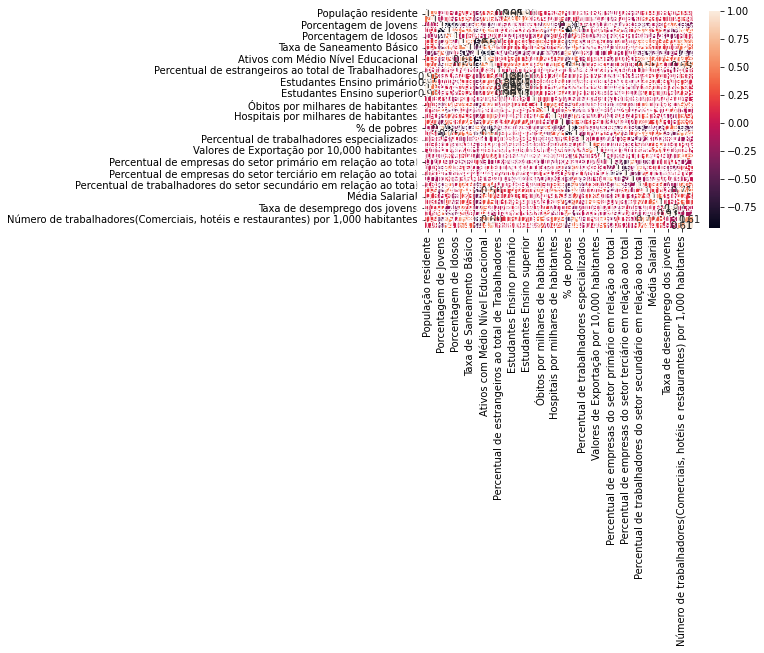

In [34]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

Como a matriz de correlação é difícil de associar, podemos ordenar, dessa matriz, as variáveis que mais se correlacionam com a urbanização categórica.

In [35]:
df.corr()["População residente"].sort_values()

Ativos com Baixo Nível Educacional                                                -0.245494
Percentual de trabalhadores do setor primário em relação ao total                 -0.077270
% de pobres                                                                       -0.075559
Porcentagem de Idosos                                                             -0.072246
Percentual de empresas do setor primário em relação ao total                      -0.071642
Porcentagem de Jovens                                                             -0.030194
Percentual de empresas do setor secundário em relação ao total                     0.003273
Número de hotéis por 10,000 habitantes                                             0.004052
Valores de Exportação por 10,000 habitantes                                        0.014814
Óbitos até 1 ano de idade por milhares de habitantes                               0.029893
Percentual de estrangeiros ao total de Trabalhadores                            

In [36]:
correlacao = df.corr()
correlacao_filtrada = correlacao["População residente"][correlacao["População residente"]>0.3]
correlacao_filtrada

População residente             1.000000
Densidade demográfica           0.440335
PIB Municipal                   0.960083
Estudantes Ensino primário      0.946782
Estudantes Ensino secundário    0.996182
Estudantes Ensino superior      0.979128
Name: População residente, dtype: float64

In [37]:
correlacao_filtrada.index

Index(['População residente', 'Densidade demográfica', 'PIB Municipal',
       'Estudantes Ensino primário', 'Estudantes Ensino secundário',
       'Estudantes Ensino superior'],
      dtype='object')

Agora vamos selecionar apenas as colunas que vamos trabalhar neste dataframe.

In [38]:
df = df[correlacao_filtrada.index]

In [39]:
y = df["População residente"]
X = df.drop("População residente",axis=1)

Agora vamos separar nossa base entre base de treinamento e de teste.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
from xgboost import XGBRegressor

In [42]:
modelo = XGBRegressor()

In [43]:
modelo.fit(X_train, y_train)

[17:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [44]:
predicao_modelo = modelo.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicao_modelo, y_test)

11870.980015408635